In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('/kaggle/input/lamost-dr7/lamostdr7.csv', sep=',', engine='python')

In [3]:
df.shape

(400398, 17)

In [4]:
df.head()

,combined_obsid,combined_obsdate,combined_lmjd,combined_mjd,combined_planid,combined_spid,combined_fiberid,combined_class,combined_subclass,combined_z,combined_ra,combined_dec,combined_logg,combined_teff,combined_feh,combined_gaia_source_id,combined_gaia_g_mean_mag
0,524309048,2017-01-26,57780,57779,HD104049N254200M02,9,48,STAR,K7,0.000066,161.285935,26.352738,4.767,3923.15,-0.856,7.247760e+17,16.421810
1,565007075,2017-04-23,57867,57866,HD150254N020528V02,7,75,STAR,F7,-0.000063,227.343459,0.597299,4.339,6312.83,0.246,4.419812e+18,9.843127
2,632508138,2018-01-18,58137,58136,K2QSOB01,8,138,STAR,K7,-0.000124,135.763805,17.513778,4.841,3903.72,-0.650,6.112215e+17,15.924013
3,101001,2011-10-24,55859,55858,F5902,1,1,STAR,G7,-0.000139,332.202274,-2.056767,4.545,5178.32,-0.497,2.676862e+18,16.468395
4,101008,2011-10-24,55859,55858,F5902,1,8,STAR,F9,0.000087,332.368745,-1.955771,4.594,5580.10,-0.019,2.676865e+18,16.039270


In [5]:
df.describe()

,combined_obsid,combined_lmjd,combined_mjd,combined_spid,combined_fiberid,combined_z,combined_ra,combined_dec,combined_logg,combined_teff,combined_feh,combined_gaia_source_id,combined_gaia_g_mean_mag
count,4.003980e+05,400398.000000,400398.000000,400398.000000,400398.000000,400398.000000,400398.000000,400398.000000,400398.000000,400398.000000,400398.000000,4.003980e+05,400398.000000
mean,4.033835e+07,56018.039446,56017.039446,8.385938,125.242833,-0.000020,128.326214,27.164101,3.966963,5642.486242,-0.212927,1.853879e+18,-44.840292
std,2.274221e+07,127.721388,127.721388,4.651643,70.970371,0.000142,83.711815,14.563717,0.708416,769.321484,0.315495,1.456718e+18,764.515133
min,1.010010e+05,55859.000000,55858.000000,1.000000,1.000000,-0.001663,0.000707,-9.666898,-0.054000,3760.030000,-2.477000,-9.999000e+03,-9999.000000
25%,2.561509e+07,55930.000000,55929.000000,4.000000,64.000000,-0.000099,69.770285,17.456036,3.887000,5068.212500,-0.385000,6.107500e+17,13.009054
50%,3.840118e+07,55966.000000,55965.000000,8.000000,125.000000,-0.000019,104.301360,28.603058,4.173000,5643.750000,-0.182000,1.329538e+18,13.951892
75%,5.180305e+07,56078.000000,56077.000000,13.000000,186.000000,0.000063,168.266331,34.533656,4.403000,6096.110000,-0.004000,3.326897e+18,14.831664
max,6.325081e+08,58137.000000,58136.000000,16.000000,250.000000,0.001507,359.999159,62.604045,4.900000,8499.320000,0.887000,6.912085e+18,20.630932


In [6]:
df.columns

Index(['combined_obsid', 'combined_obsdate', 'combined_lmjd', 'combined_mjd',
       'combined_planid', 'combined_spid', 'combined_fiberid',
       'combined_class', 'combined_subclass', 'combined_z', 'combined_ra',
       'combined_dec', 'combined_logg', 'combined_teff', 'combined_feh',
       'combined_gaia_source_id', 'combined_gaia_g_mean_mag'],
      dtype='object')

In [7]:
df.rename(columns={'combined_gaia_g_mean_mag': 'combined_Gmag'}, inplace=True)   

In [8]:
df = df.drop_duplicates()

In [9]:
df.isna().sum()

combined_obsid             0
combined_obsdate           0
combined_lmjd              0
combined_mjd               0
combined_planid            0
combined_spid              0
combined_fiberid           0
combined_class             0
combined_subclass          0
combined_z                 0
combined_ra                0
combined_dec               0
combined_logg              0
combined_teff              0
combined_feh               0
combined_gaia_source_id    0
combined_Gmag              0
dtype: int64

In [10]:
df = df.dropna(subset=['combined_subclass','combined_teff', 'combined_logg', 'combined_feh','combined_gaia_source_id', 'combined_Gmag'])

In [11]:
df.shape

(400398, 17)

In [12]:
df['combined_class'].unique()

array(['STAR'], dtype=object)

In [13]:
df['combined_subclass'].unique()

array(['K7', 'F7', 'G7', 'F9', 'G0', 'K3', 'F6', 'F5', 'G3', 'G9', 'K5',
       'G6', 'G2', 'G8', 'K1', 'G5', 'F0', 'F2', 'K0', 'F8', 'F3', 'G4',
       'K4', 'A7V', 'G1', 'A9V', 'F4', 'K2', 'A7III', 'A5V', 'A8III',
       'A7IV', 'A6IV', 'A1IV', 'A2IV', 'A3IV', 'A2V', 'A6V', 'A0III',
       'A3V'], dtype=object)

In [14]:
df['spectral_class'] = df['combined_subclass'].str[0]

In [15]:
df['spectral_class'].unique()

array(['K', 'F', 'G', 'A'], dtype=object)

In [16]:
df = df[
    df['combined_subclass'].notna() &
    (df['combined_z'].abs() < 0.001)
]

In [17]:
valid_classes = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

df_clean = df[df['spectral_class'].isin(valid_classes)].copy()


In [18]:
df_clean['spectral_class'].unique()


array(['K', 'F', 'G', 'A'], dtype=object)

In [19]:
df[df['combined_subclass'].str.startswith('M', na=False)].shape

(0, 18)

In [20]:
df_clean.groupby('spectral_class')['combined_teff'].describe()

,count,mean,std,min,25%,50%,75%,max
spectral_class,,,,,,,,
A,9600.0,7742.543146,431.264696,6479.52,7453.1950,7797.910,8085.3325,8499.32
F,130580.0,6272.936786,493.310117,4251.37,6006.2825,6258.100,6549.4325,8412.27
G,208054.0,5389.299307,439.910172,3800.98,5044.2350,5468.780,5749.2400,7078.44
K,51914.0,4684.469503,387.070228,3760.03,4399.0350,4719.835,4962.8575,7040.69


In [21]:
df_clean = df_clean.dropna(subset=['spectral_class'])

In [22]:
df_clean['spectral_class'].unique()

array(['K', 'F', 'G', 'A'], dtype=object)

In [23]:
spectral_order = {
    'O': 0,
    'B': 1,
    'A': 2,
    'F': 3,
    'G': 4,
    'K': 5,
    'M': 6
}

df_clean['spectral_label'] = df_clean['spectral_class'].map(spectral_order)

In [24]:
df_clean

,combined_obsid,combined_obsdate,combined_lmjd,combined_mjd,combined_planid,combined_spid,combined_fiberid,combined_class,combined_subclass,combined_z,combined_ra,combined_dec,combined_logg,combined_teff,combined_feh,combined_gaia_source_id,combined_Gmag,spectral_class,spectral_label
0,524309048,2017-01-26,57780,57779,HD104049N254200M02,9,48,STAR,K7,0.000066,161.285935,26.352738,4.767,3923.15,-0.856,7.247760e+17,16.421810,K,5
1,565007075,2017-04-23,57867,57866,HD150254N020528V02,7,75,STAR,F7,-0.000063,227.343459,0.597299,4.339,6312.83,0.246,4.419812e+18,9.843127,F,3
2,632508138,2018-01-18,58137,58136,K2QSOB01,8,138,STAR,K7,-0.000124,135.763805,17.513778,4.841,3903.72,-0.650,6.112215e+17,15.924013,K,5
3,101001,2011-10-24,55859,55858,F5902,1,1,STAR,G7,-0.000139,332.202274,-2.056767,4.545,5178.32,-0.497,2.676862e+18,16.468395,G,4
4,101008,2011-10-24,55859,55858,F5902,1,8,STAR,F9,0.000087,332.368745,-1.955771,4.594,5580.10,-0.019,2.676865e+18,16.039270,F,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400393,83304140,2012-11-25,56257,56256,GAC117N31B1,4,140,STAR,F9,0.000093,117.485320,31.046124,4.243,5624.44,-0.064,8.807497e+17,15.473358,F,3
400394,83304141,2012-11-25,56257,56256,GAC117N31B1,4,141,STAR,G6,0.000105,117.379830,31.058643,4.471,5428.39,-0.204,8.807560e+17,15.792936,G,4
400395,83304142,2012-11-25,56257,56256,GAC117N31B1,4,142,STAR,F2,0.000121,117.761150,31.049509,4.208,5986.30,-0.690,8.807470e+17,16.144630,F,3
400396,83304144,2012-11-25,56257,56256,GAC117N31B1,4,144,STAR,F9,-0.000160,117.480420,31.139465,4.258,6022.60,-0.265,8.807624e+17,15.642846,F,3


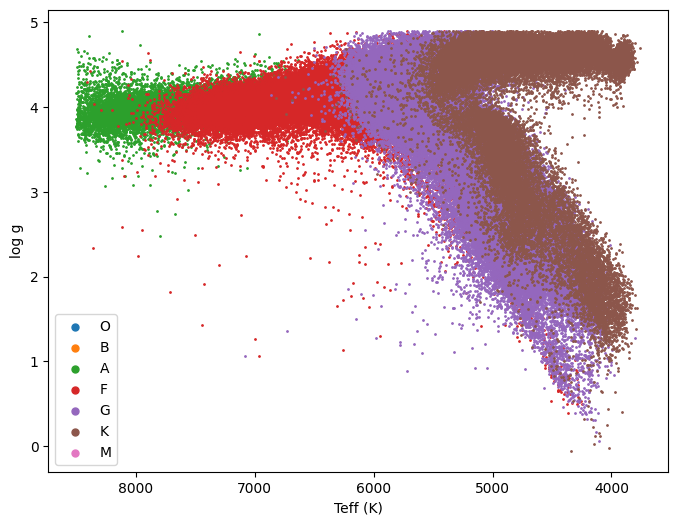

In [25]:
plt.figure(figsize=(8,6))
for cls in ['O','B','A','F','G','K','M']:
    subset = df_clean[df_clean['spectral_class'] == cls]
    plt.scatter(
        subset['combined_teff'],
        subset['combined_logg'],
        s=1,
        label=cls
    )

plt.gca().invert_xaxis()   # hot → cool
plt.xlabel('Teff (K)')
plt.ylabel('log g')
plt.legend(markerscale=5)
plt.show()

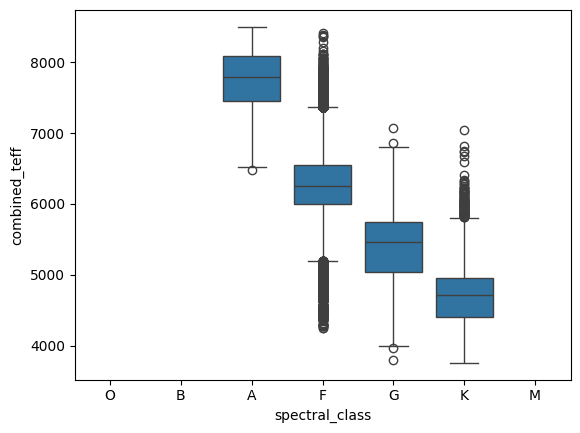

In [26]:
sns.boxplot(
    x='spectral_class',
    y='combined_teff',
    data=df_clean,
    order=['O','B','A','F','G','K','M']
)
plt.show()

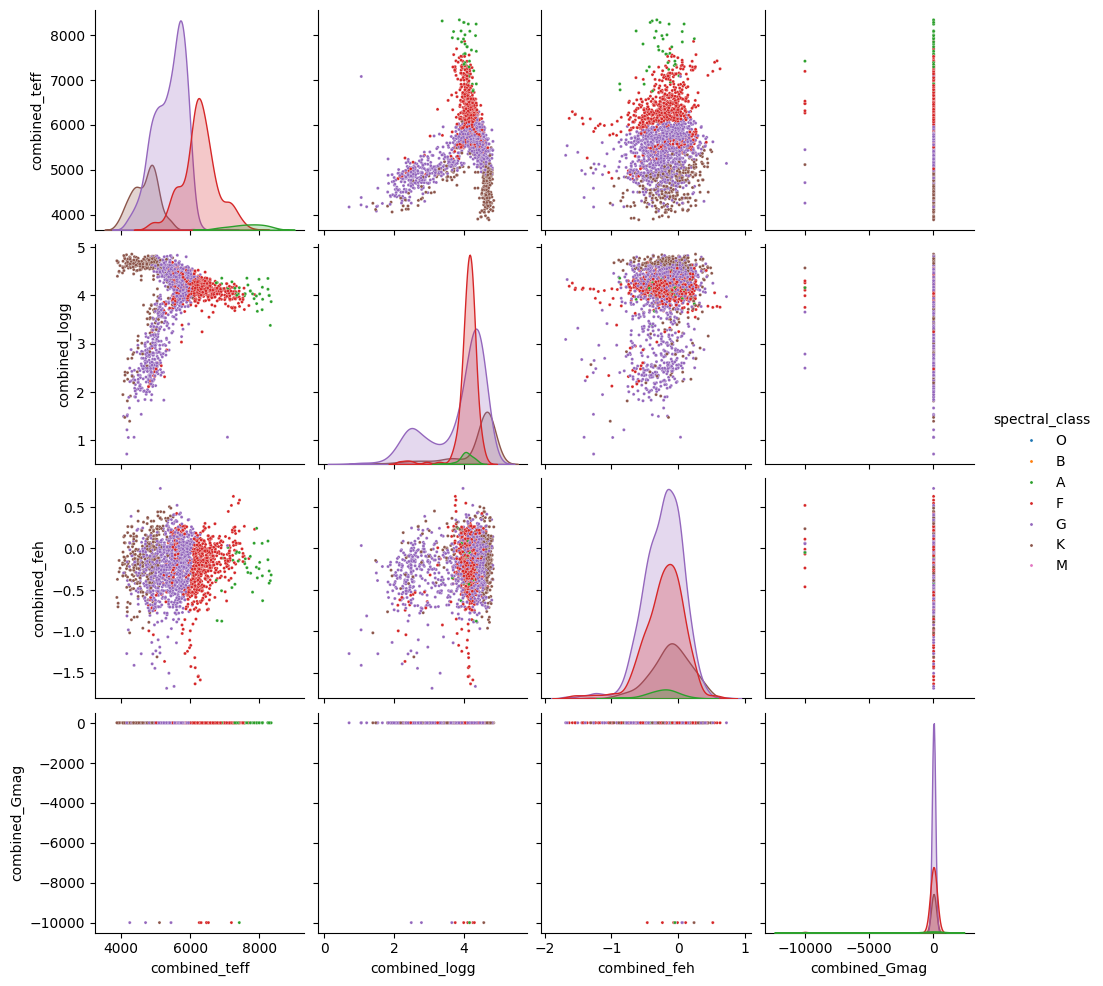

In [27]:
features = ['combined_teff', 'combined_logg', 'combined_feh', 'combined_Gmag']
sns.pairplot(
    df_clean.sample(2000),
    vars=features,
    hue='spectral_class',
    hue_order=['O','B','A','F','G','K','M'],
    plot_kws={'s':5}
)
plt.show()


## L1 Regularization

In [34]:
features = ['combined_teff', 'combined_logg', 'combined_feh', 'combined_Gmag']
X = df[features].values
y = df['spectral_class'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# L1-regularized logistic regression
l1_model = LogisticRegression(
    penalty='l1',
    solver='saga',
    C=0.1,                 
    multi_class='multinomial',
    max_iter=5000,
    n_jobs=-1
)

l1_model.fit(X_train, y_train)

selector = SelectFromModel(l1_model, prefit=True)
X_train_sel = selector.transform(X_train)
X_test_sel  = selector.transform(X_test)

selected_features = np.array(features)[selector.get_support()]
print("Selected features:", selected_features)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Selected features: ['combined_teff' 'combined_logg' 'combined_feh' 'combined_Gmag']


## Training & Prediction

In [36]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_leaf=20,
    max_features='sqrt',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train_sel, y_train)

y_pred = rf.predict(X_test_sel)

print("RF accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

RF accuracy: 0.8640509808821691
              precision    recall  f1-score   support

           A       0.64      0.93      0.75      1920
           F       0.88      0.84      0.86     26116
           G       0.89      0.87      0.88     41611
           K       0.78      0.90      0.83     10383

    accuracy                           0.86     80030
   macro avg       0.80      0.88      0.83     80030
weighted avg       0.87      0.86      0.87     80030



## L2 Regularization

In [39]:
features = ['combined_teff', 'combined_logg', 'combined_feh', 'combined_Gmag']
X = df[features].values
y = df['spectral_class'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

l2_model = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    C=0.1,                 
    multi_class='multinomial',
    max_iter=5000,
    n_jobs=-1
)

l2_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, max_iter=5000, multi_class='multinomial', n_jobs=-1)

## Training & Prediction

In [40]:
rf_l2combo = RandomForestClassifier(
    n_estimators=300,
    max_depth=18,
    min_samples_leaf=30,
    max_features='sqrt',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

rf_l2combo.fit(X_train, y_train)

y_pred = rf_l2combo.predict(X_test)

print("RF + L2 features accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

RF + L2 features accuracy: 0.8610895914032238
              precision    recall  f1-score   support

           A       0.60      0.93      0.73      1920
           F       0.88      0.83      0.86     26116
           G       0.89      0.87      0.88     41611
           K       0.77      0.90      0.83     10383

    accuracy                           0.86     80030
   macro avg       0.79      0.88      0.83     80030
weighted avg       0.87      0.86      0.86     80030

